In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df  = pd.read_csv('/content/musk_csv.csv',index_col='ID')
df.head(-5)

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6589,NON-MUSK-jp13,jp13_2+29,37,-134,-28,33,-117,-97,208,3,-108,-78,-42,-27,-26,-124,-89,-292,-92,-55,-12,-51,-72,82,22,-64,-98,46,72,-151,9,-136,-114,121,-47,-208,-36,82,-172,164,...,-170,-79,-53,35,-97,-87,-82,-103,106,133,-18,7,-54,-42,155,184,113,-178,-103,-123,23,-42,117,-26,1,9,-51,127,31,-231,-242,-205,-10,22,111,195,-55,-150,113,0
6590,NON-MUSK-jp13,jp13_2+3,37,-63,-101,34,-117,-99,214,11,-88,-72,-41,-22,-22,-112,-93,-290,-91,-55,-51,-56,-49,137,10,-68,-98,-5,87,128,9,-132,-114,121,-46,-202,-36,82,-172,55,...,-163,-72,-54,35,-99,-90,-53,-100,-112,-73,-168,-23,-44,-62,114,221,171,-151,-103,-108,-6,-35,104,-26,0,9,-60,127,31,-229,-235,-204,-8,23,111,195,-55,-150,113,0
6591,NON-MUSK-jp13,jp13_2+30,48,-189,-37,28,-117,-85,209,10,-110,-75,-50,-31,-28,-130,-84,-299,-95,-60,-4,-53,-76,83,23,-59,-98,39,76,-149,11,-140,-116,-93,-9,-216,-33,103,-167,162,...,-177,-85,-46,-62,-86,-87,-88,-104,106,134,-8,10,-51,-38,153,188,115,-178,-103,-120,19,-40,119,-26,3,8,-164,7,-192,-237,-257,-210,14,155,131,187,-72,-173,13,0


In [0]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,12.700667,...,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,80.750001,...,130.607205,70.016546,98.100733,60.633027,84.316386,61.733776,68.098995,87.253395,61.664300,97.997434,77.580190,94.753428,64.344336,69.094605,82.410293,103.746483,103.113954,54.087579,51.177725,21.463582,63.048333,73.864481,83.274158,60.100098,70.788743,67.538140,76.908685,98.511502,97.547356,83.710890,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,-328.000000,-321.000000,-305.000000,-342.000000,-294.000000,-327.000000,-224.000000,-308.000000,-286.000000,-252.000000,-295.000000,-185.000000,-253.000000,-76.000000,-100.000000,-242.000000,-205.000000,-166.000000,-142.000000,-162.000000,-117.000000,-143.000000,-139.000000,-279.000000,-160.000000,-7.000000,-175.000000,-190.000000,-148.000000,-180.000000,...,-221.000000,-307.000000,-189.000000,-123.000000,-140.000000,-319.000000,-338.000000,-336.000000,-196.000000,-197.000000,-199.000000,-243.000000,-283.000000,-290.000000,-185.000000,-157.000000,-171.000000,-179.000000,-106.000000,-136.000000,-200.000000,-213.000000,-190.000000,-140.000000,-128.000000,-114.000000,-173.000000,-143.000000,-198.000000,-257.000000,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,37.00000

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6598 entries, 1 to 6598
Columns: 169 entries, molecule_name to class
dtypes: int64(167), object(2)
memory usage: 8.6+ MB


In [0]:
df.select_dtypes(include='object')

,molecule_name,conformation_name
ID,,
1,MUSK-211,211_1+1
2,MUSK-211,211_1+10
3,MUSK-211,211_1+11
4,MUSK-211,211_1+12
5,MUSK-211,211_1+13
...,...,...
6594,NON-MUSK-jp13,jp13_2+5
6595,NON-MUSK-jp13,jp13_2+6
6596,NON-MUSK-jp13,jp13_2+7


In [73]:
pp.ProfileReport(df).to_file('musk_detection.html')
#  pandas_profiling extends the pandas DataFrame with df.profile_report() for quick data analysis.
# reference : https://github.com/pandas-profiling/pandas-profiling

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
df.isna().values.any()

False

In [0]:
df.groupby('class').count()
# class 1 = MUSK MOLECULE 
# class 0 = NON -MUSK MOLECULE
# Now the model created from this data would be good at detecting Non musk molecules as it has almost 5 times the data musk molecules have 

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,...,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581
1,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,...,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017


In [0]:
corr_matrix = df.corr().abs()
corr_matrix.shape

(167, 167)

In [17]:
upper_traingle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper_traingle.shape
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.triu.html

(167, 167)

In [18]:
upper_traingle

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
f1,NaN,0.142464,0.164292,0.291054,0.001037,0.090659,0.071879,0.416191,0.090701,0.185305,0.489531,0.329323,0.145467,0.451025,0.474834,0.168133,0.061720,0.217193,0.363618,0.263439,0.064906,0.042014,0.061941,0.235260,0.241263,0.136936,0.046363,0.077570,0.146275,0.246323,0.137254,0.116489,0.063658,0.282979,0.228776,0.421946,0.168445,0.131857,0.150626,0.122952,...,0.270847,0.130106,0.282326,0.188010,0.142333,0.018388,0.256826,0.394867,0.086513,0.123043,0.158354,0.119479,0.046166,0.034662,0.123627,0.113538,0.107770,0.065500,0.008926,0.088045,0.107410,0.170390,0.094255,0.167098,0.305877,0.325536,0.140517,0.102513,0.132298,0.079600,0.010485,0.146428,0.153096,0.002383,0.634797,0.061317,0.142004,0.443060,0.057199,0.120883
f2,NaN,NaN,0.611675,0.244145,0.134689,0.125947,0.449526,0.187318,0.484187,0.270608,0.052151,0.023072,0.088225,0.172705,0.124140,0.053458,0.449154,0.073063,0.017114,0.182890,0.332913,0.474994,0.450216,0.284007,0.349150,0.435672,0.174971,0.087526,0.151403,0.336306,0.116604,0.189070,0.367302,0.285640,0.359259,0.067595,0.075352,0.356764,0.428873,0.285192,...,0.316801,0.184939,0.306362,0.017298,0.095467,0.189755,0.067644,0.205260,0.209092,0.413138,0.152026,0.454338,0.273073,0.307311,0.316983,0.483871,0.494869,0.171277,0.019855,0.006232,0.498552,0.653606,0.242832,0.377931,0.314299,0.341124,0.752593,0.170107,0.651242,0.169423,0.172481,0.309392,0.339496,0.030338,0.118212,0.028524,0.069193,0.133091,0.046361,0.099896
f3,NaN,NaN,NaN,0.378516,0.080964,0.210432,0.754798,0.426254,0.760313,0.429700,0.154603,0.061773,0.175302,0.328917,0.266068,0.105703,0.768686,0.227777,0.046317,0.336981,0.582247,0.758838,0.731839,0.448241,0.556338,0.696615,0.328863,0.390410,0.231447,0.532059,0.040353,0.011557,0.476498,0.423300,0.512949,0.079759,0.096025,0.356355,0.769293,0.262381,...,0.488989,0.274484,0.461959,0.157913,0.103619,0.306079,0.105471,0.394752,0.665088,0.600310,0.444991,0.717029,0.398967,0.488419,0.262273,0.692855,0.741012,0.122987,0.040803,0.030205,0.773667,0.721962,0.286981,0.526465,0.476550,0.509092,0.644592,0.018784,0.408260,0.291073,0.261200,0.502924,0.259424,0.020607,0.206860,0.131828,0.111005,0.086150,0.020434,0.089760
f4,NaN,NaN,NaN,NaN,0.044896,0.222191,0.453786,0.185135,0.420407,0.559255,0.426113,0.411495,0.013106,0.263494,0.329161,0.107317,0.443540,0.149202,0.355830,0.006209,0.371661,0.475065,0.447048,0.534812,0.728112,0.330514,0.319219,0.349934,0.476369,0.741674,0.064376,0.108775,0.489964,0.701427,0.698268,0.091186,0.208231,0.238583,0.436618,0.236082,...,0.731694,0.420229,0.682369,0.086018,0.169857,0.248849,0.252382,0.175814,0.228995,0.363838,0.144315,0.371451,0.240790,0.364969,0.211595,0.427092,0.450192,0.084413,0.160132,0.083617,0.163168,0.132261,0.277631,0.598446,0.725491,0.837919,0.417771,0.167011,0.261924,0.239451,0.308906,0.607435,0.279430,0.118705,0.241346,0.182826,0.189530,0.364233,0.072985,0.098592
f5,NaN,NaN,NaN,NaN,NaN,0.024860,0.045389,0.162539,0.064376,0.005144,0.161626,0.118472,0.093373,0.167317,0.165657,0.059210,0.077701,0.078286,0.123356,0.144734,0.025771,0.039126,0.056339,0.037696,0.016819,0.067506,0.035839,0.052012,0.026054,0.041389,0.079001,0.073848,0.017262,0.068699,0.008634,0.238982,0.008427,0.075806,0.013510,0.050014,...,0.056590,0.046768,0.019693,0.052158,0.118813,0.000948,0.117790,0.153569,0.035905,0.075048,0.006013,0.068191,0.027020,0.004584,0.060535,0.057213,0.057807,0.046401,0.041047,0.075433,0.075748,0.090497,0.044579,0.023158,0.029956,0.039236,0.041163,0.026753,0.041724,0.043933,0.004808,0.019286,0.225484,0.195782,0.103419,0.027131,0.046188,0.090038,0.081910,0.045040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [20]:
high_corr = [column for column in upper_traingle.columns if any(upper_traingle[column] > 0.90)]
len(high_corr)
# remove any column that has a correlation of more than 90%

59

In [21]:
df = df.drop(columns = high_corr)
df.shape
# drop the highly correlated columns 
# pandas_profiling gives us a the data as to how many of the columns are highly related

(6598, 110)

In [22]:
X = df.drop(['molecule_name','conformation_name','class'],axis=1)
y = df['class']
print(X.shape)
print(y.shape)

(6598, 107)
(6598,)


In [23]:
# so to handle the imbalance we import 
from imblearn.combine import SMOTETomek

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
smote = SMOTETomek(random_state=42)

In [25]:
X_res, y_res = smote.fit_sample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [26]:
print(X_res.shape)
print(y_res.shape)

(11162, 107)
(11162,)


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res, random_state=30, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8929, 107)
(2233, 107)
(8929,)
(2233,)


In [31]:
y_train[:5]

array([1, 1, 0, 0, 1])

In [0]:
from sklearn.preprocessing import StandardScaler
ss  = StandardScaler()

In [0]:
X_train  = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [47]:
type(X_train)

numpy.ndarray

**USING CNN**

In [43]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [55]:
Xtrain_bias=[1]*X_train.shape[0]
Xtest_bias=[1]*X_test.shape[0]

Xtrain_bias = np.expand_dims(Xtrain_bias,axis=1)
Xtest_bias  = np.expand_dims(Xtest_bias,axis=1)
X_train = np.append(X_train,Xtrain_bias,axis=1)
X_test = np.append(X_test,Xtest_bias,axis=1)

print(X_test.shape)
print(X_train.shape)

(2233, 108)
(8929, 108)


In [0]:
X_train=X_train.reshape(X_train.shape[0],18,6,1)
X_test=X_test.reshape(X_test.shape[0],18,6,1)

In [0]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(2,2),activation='relu',input_shape=(18,6,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])

In [63]:
history = model.fit(X_train,y_train,batch_size=128,epochs=20,validation_data=(X_test,y_test))
score=model.evaluate(X_test,y_test,verbose=0)
print(score)




Train on 8929 samples, validate on 2233 samples
Epoch 1/20





8929/8929 [==============================] - 2s 191us/step - loss: 0.3938 - acc: 0.8234 - val_loss: 0.2489 - val_acc: 0.9104
Epoch 2/20
8929/8929 [==============================] - 1s 95us/step - loss: 0.2282 - acc: 0.9086 - val_loss: 0.2157 - val_acc: 0.9091
Epoch 3/20
8929/8929 [==============================] - 1s 95us/step - loss: 0.1581 - acc: 0.9399 - val_loss: 0.1148 - val_acc: 0.9601
Epoch 4/20
8929/8929 [==============================] - 1s 94us/step - loss: 0.1152 - acc: 0.9589 - val_loss: 0.0876 - val_acc: 0.9713
Epoch 5/20
8929/8929 [==============================] - 1s 93us/step - loss: 0.0900 - acc: 0.9693 - val_loss: 0.0700 - val_acc: 0.9781
Epoch 6/20
8929/8929 [==============================] - 1s 93us/step - loss: 0.0725 - acc: 0.9746 - val_loss: 0.0670 - val_acc: 0.9807
Epoch 7/20
8929/8929 [==============================] - 1s 94us/step - loss: 0.0589 - acc: 0.9811 - val_loss: 0.0532 - val_acc: 0.982

**PERFORMANCE EVALUATION  GRAPH**

In [0]:
model.save('Musk_model.h5')

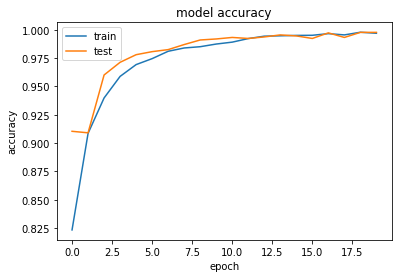

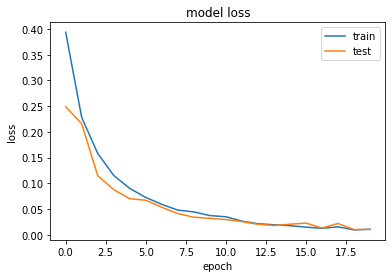

In [67]:
# PERFORMANCE EVALUATION GRAPH FOR ACCURACY
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# PERFORMANCE EVALUATION GRAPH FOR LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score

In [70]:
print("Validation Loss:",score[0])
print("Validation Accuracy:",score[1])
print("Precision: ",precision_score(y_test,model.predict_classes(X_test)))
print("f1_score: ",f1_score(y_test,model.predict_classes(X_test)))
print("recall: ",recall_score(y_test,model.predict_classes(X_test)))


Validation Loss: 0.010248838356236039
Validation Accuracy: 0.9977608598298253
Precision:  0.9956445993031359
f1_score:  0.997817546922741
recall:  1.0


In [72]:
print(roc_auc_score(y_test,model.predict_classes(X_test)))

0.9977064220183487
